In [ ]:
import torch
from PIL import Image
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

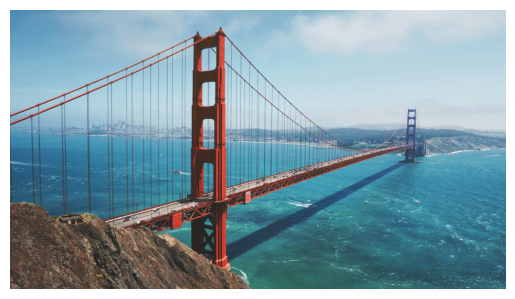

In [ ]:
url = "https://images.unsplash.com/photo-1501594907352-04cda38ebc29"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

plt.imshow(image)
plt.axis("off")
plt.show()


In [ ]:
# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Generate the caption
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)

print("📝 Generated Caption:", caption)


📝 Generated Caption: a bridge over the ocean with a view of the city


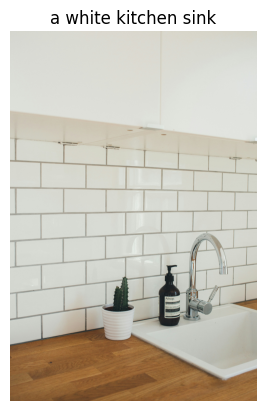

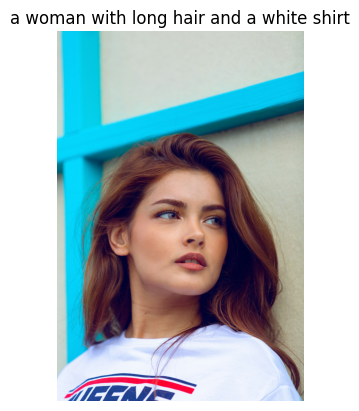

In [ ]:
urls = [
    "https://images.unsplash.com/photo-1523413651479-597eb2da0ad6",
    "https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e"
]

for url in urls:
    image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)

    plt.imshow(image)
    plt.axis("off")
    plt.title(caption)
    plt.show()